In [1]:
# standard imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# natural language processing: n-gram ranking
import re
import nltk
import unicodedata
from nltk.corpus import stopwords

In [2]:
# store all stopwords
additional_stopwords = []
stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords

In [3]:
# function to cleanup text and find words in it
def extract_words_from_text(text):
    """
    Function to clean up the passed text.\n
    All words that are not designated as a stop word are lemmatized afte encoding and basic regex parsing is performed.\n
    \n
    Parameters:
    text - Text to be worked with
    """

    # lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()

    # text cleaning
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()

    # word list
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
# function to cleanup text and find words in it
def find_ngrams(words, source):
    """
    Function to find 1/2/3 grams from passed word list.\n
    \n
    Parameters:
    words - Word list to be worked with
    """

    for i in range(1, 4):
        if i == 3:
            series = (pd.Series(nltk.ngrams(words, i)).value_counts())[:10]
        else:
            series = (pd.Series(nltk.ngrams(words, i)).value_counts())[:25]
        
        # print as text
        print(f"{i}-grams:")
        print(series)

        # show plot
        series.sort_values().plot.barh(width=.8, figsize=(20, 15))
        plt.title(f'Most Frequently Occuring {i}-grams from {source}')
        plt.ylabel(f'{i}-gram')
        plt.xlabel('No. of Occurances')
        plt.show()

### Getting Page Content

In [5]:
# getting page content
html_response = requests.get("https://www.vogue.co.uk/fashion/gallery/spring-summer-2022-fashion-trends")
html_text = html_response.text
soup = BeautifulSoup(html_text, "lxml")

In [6]:
# various sources of text
para_text = [element.text.strip() for element in soup.find_all("p")]
header_text = [element.text.strip() for element in soup.find_all(["h1", "h2", "h3", "h4", "h5", "h6"])]
span_text = [element.text.strip() for element in soup.find_all("span")]
all_text = para_text + header_text + span_text

### All Text

1-grams:
(miu,)           17
(fashion,)       13
(alexander,)     12
(mcqueen,)       12
(trend,)         12
(gucci,)         10
(prada,)         10
(bottega,)        9
(collection,)     9
(veneta,)         9
(take,)           9
(christian,)      9
(louis,)          9
(dress,)          8
(2022,)           8
(versace,)        8
(vuitton,)        8
(saint,)          7
(armani,)         7
(new,)            7
(chanel,)         7
(balenciaga,)     7
(sexy,)           7
(fendi,)          7
(supriya,)        7
dtype: int64


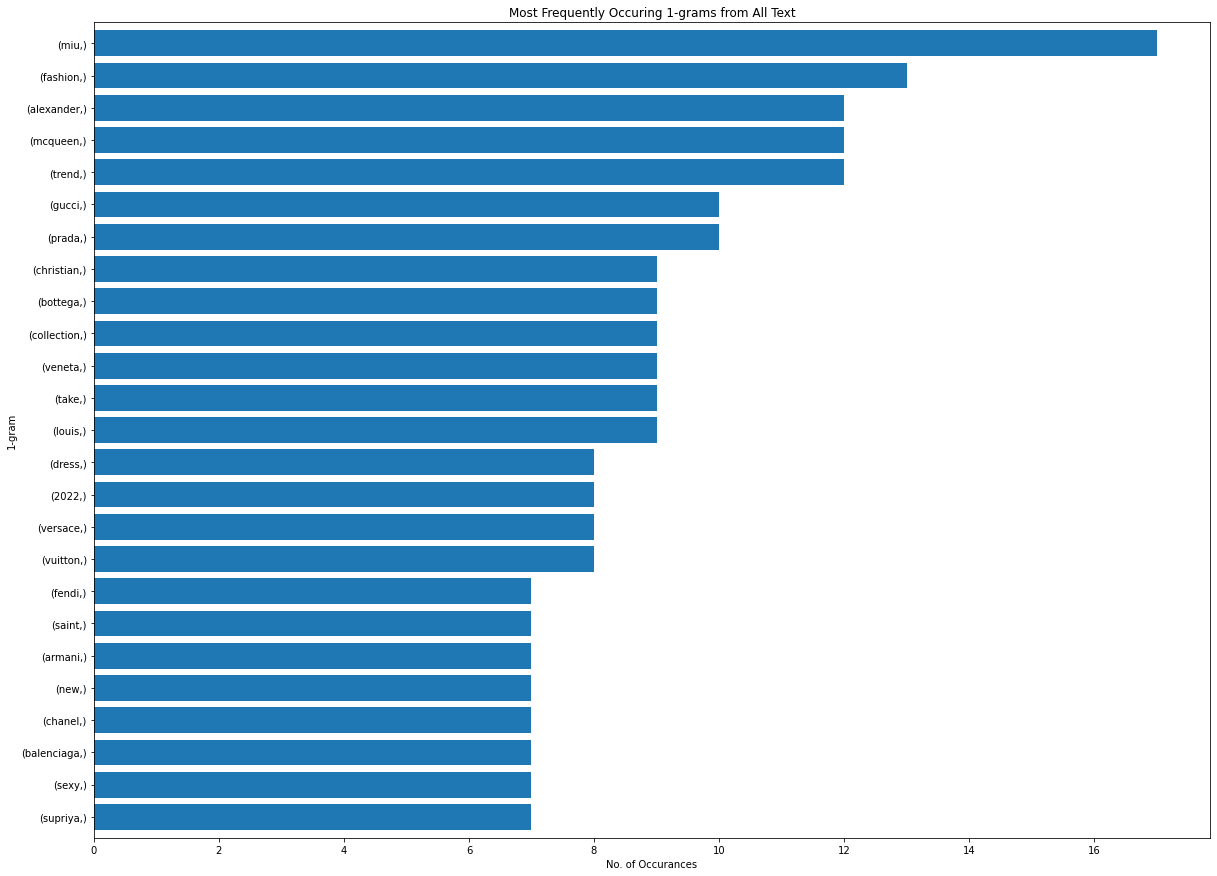

2-grams:
(alexander, mcqueen)    12
(bottega, veneta)        9
(miu, miu)               8
(louis, vuitton)         8
(supriya, lele)          7
(dolce, gabbana)         6
(fashion, trend)         6
(christian, dior)        6
(tom, ford)              6
(springsummer, 2022)     5
(richard, quinn)         5
(emilia, wickstead)      5
(lorenzo, serafini)      4
(philosophy, di)         4
(nensi, dojaka)          4
(carolina, herrera)      4
(rejina, pyo)            4
(saint, sernin)          4
(max, mara)              4
(ludovic, de)            4
(di, lorenzo)            4
(giorgio, armani)        4
(alberta, ferretti)      4
(molly, goddard)         4
(de, saint)              4
dtype: int64


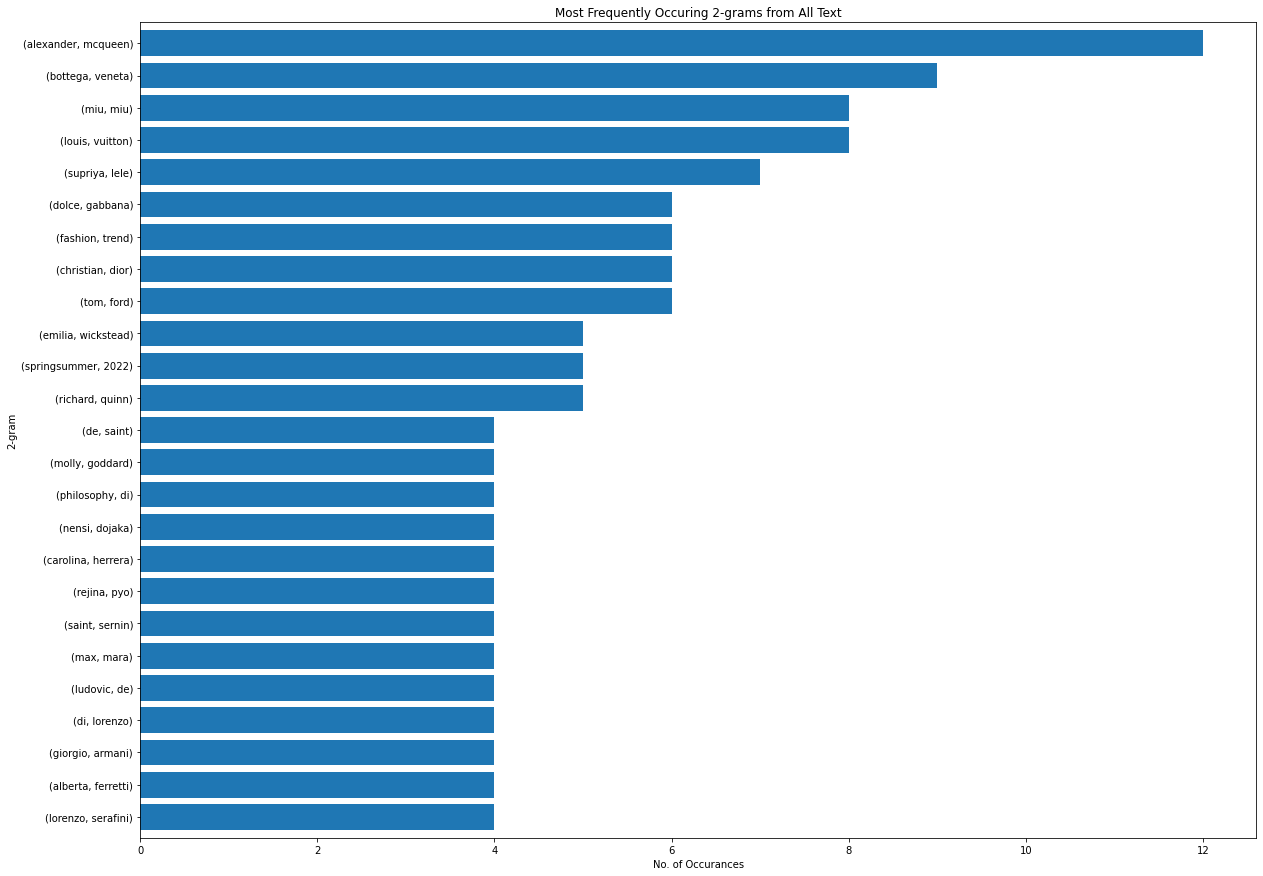

3-grams:
(ludovic, de, saint)               4
(philosophy, di, lorenzo)          4
(de, saint, sernin)                4
(di, lorenzo, serafini)            4
(andreas, kronthaler, vivienne)    2
(charles, jeffrey, loverboy)       2
(jason, wu, collection)            2
(comme, de, garcons)               2
(michael, kor, collection)         2
(rocha, richard, quinn)            2
dtype: int64


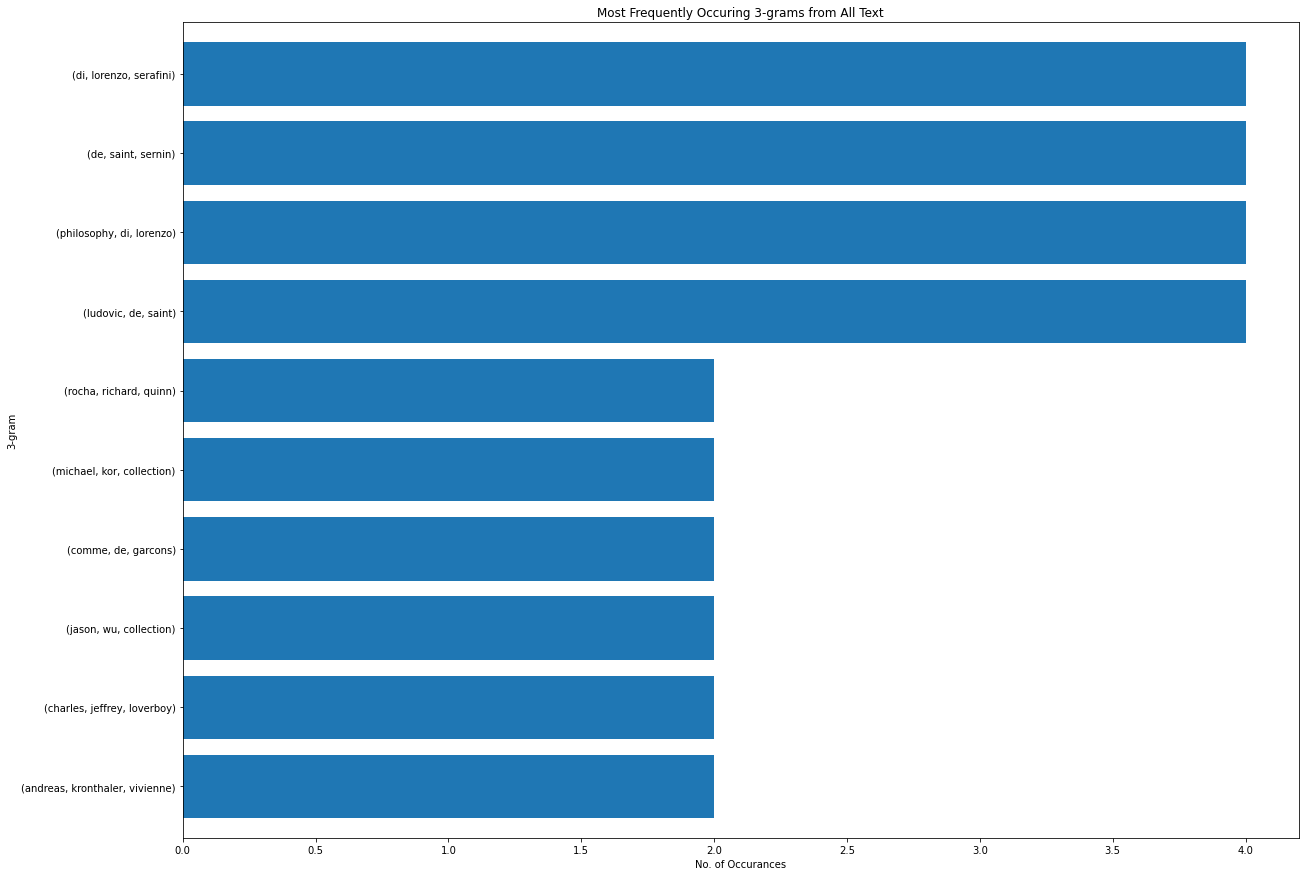

In [7]:
# ngrams based on all text
words = extract_words_from_text(text=" ".join(all_text))
find_ngrams(words=words, source="All Text")

### Paragraph Text

1-grams:
(take,)            9
(trend,)           9
(fashion,)         9
(dress,)           8
(2022,)            7
(made,)            6
(come,)            6
(show,)            6
(spring,)          5
(collection,)      5
(like,)            5
(white,)           5
(miu,)             5
(new,)             5
(even,)            5
(making,)          5
(feel,)            5
(thing,)           5
(body,)            5
(sexy,)            5
(prada,)           4
(particularly,)    4
(note,)            4
(designer,)        4
(super,)           4
dtype: int64


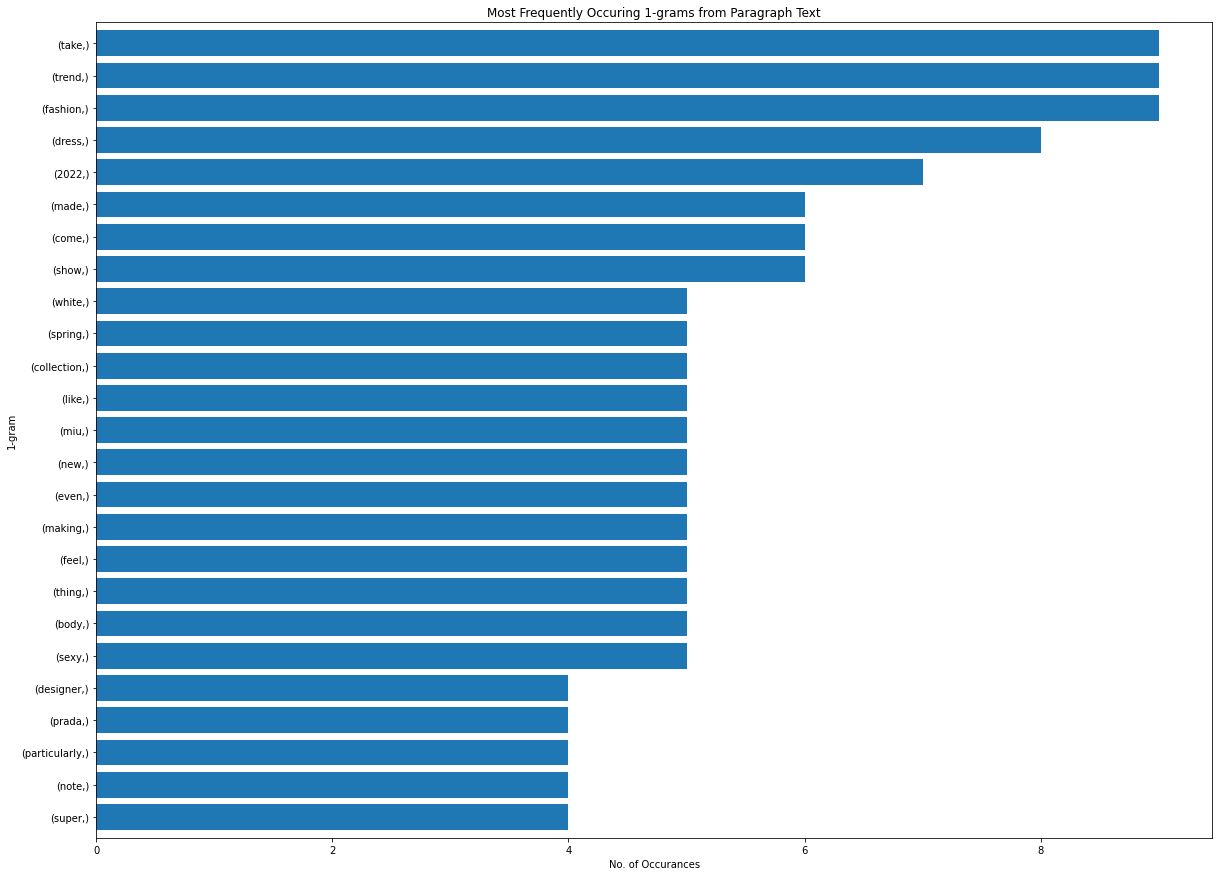

2-grams:
(fashion, trend)         4
(springsummer, 2022)     4
(supriya, lele)          3
(mini, dress)            3
(alexander, mcqueen)     2
(2022, fashion)          2
(making, entrance)       2
(thing, got)             2
(nensi, dojaka)          2
(dolce, gabbana)         2
(young, designer)        2
(headtotoe, white)       2
(ludovic, de)            2
(miu, miu)               2
(conde, nast)            2
(come, new)              2
(saint, sernin)          2
(tom, ford)              2
(show, note)             2
(louis, vuitton)         2
(micro, hemline)         2
(biker, jacket)          2
(de, saint)              2
(sum, industry)          1
(occasionally, paris)    1
dtype: int64


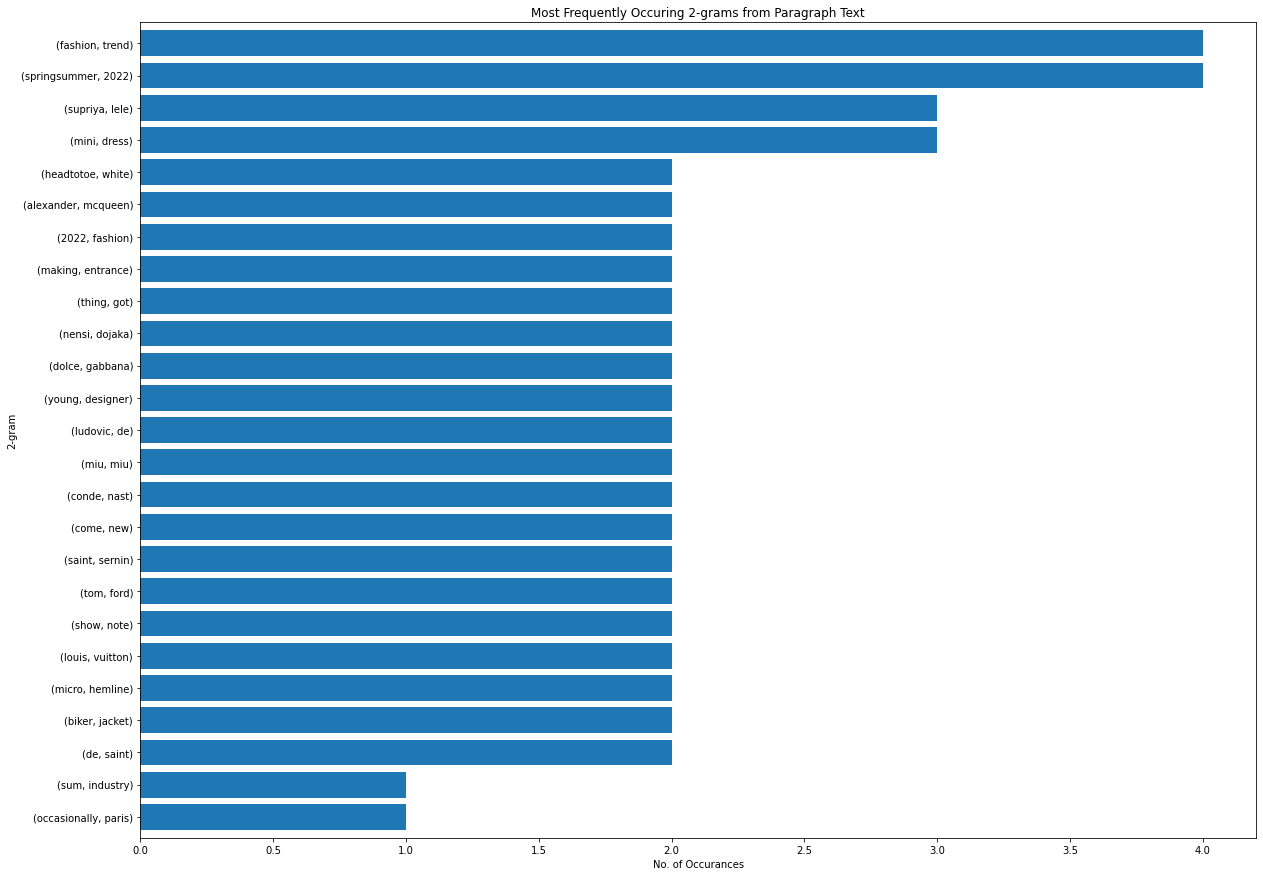

3-grams:
(de, saint, sernin)              2
(2022, fashion, trend)           2
(springsummer, 2022, fashion)    2
(ludovic, de, saint)             2
(trend, super, sheer)            1
(follow, u, ellie)               1
(indigenous, model, quannah)     1
(lump, together, many)           1
(taken, every, way)              1
(even, smiled, twirling)         1
dtype: int64


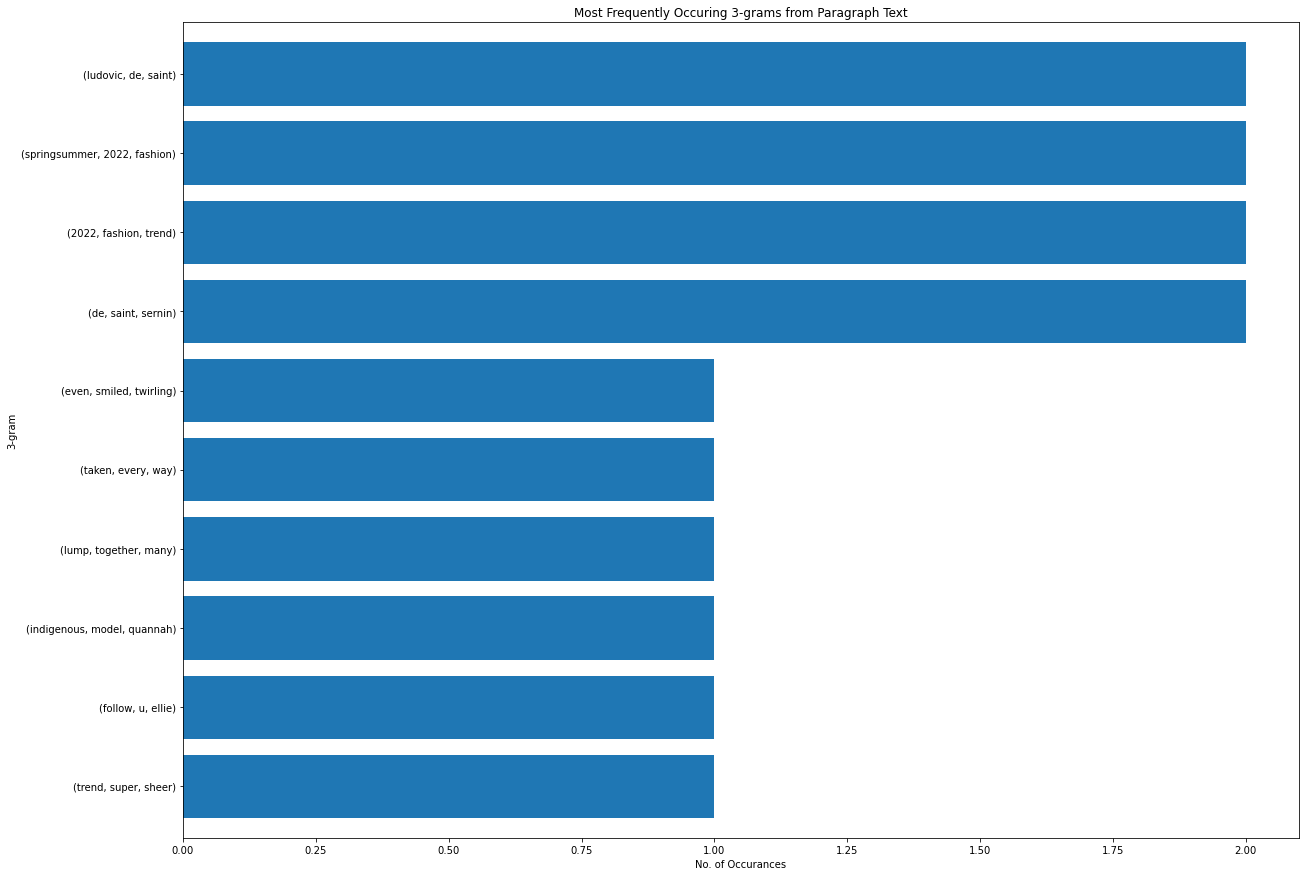

In [8]:
# ngrams based on para text
words = extract_words_from_text(text=" ".join(para_text))
find_ngrams(words=words, source="Paragraph Text")

### Header Text

1-grams:
(miu,)            6
(mcqueen,)        5
(alexander,)      5
(bottega,)        4
(veneta,)         4
(gucci,)          4
(christian,)      4
(dior,)           3
(vuitton,)        3
(armani,)         3
(louis,)          3
(balenciaga,)     3
(prada,)          3
(missoni,)        3
(versace,)        3
(fendi,)          3
(richard,)        3
(max,)            2
(burberry,)       2
(lanvin,)         2
(supriya,)        2
(emilia,)         2
(alberta,)        2
(bos,)            2
(christopher,)    2
dtype: int64


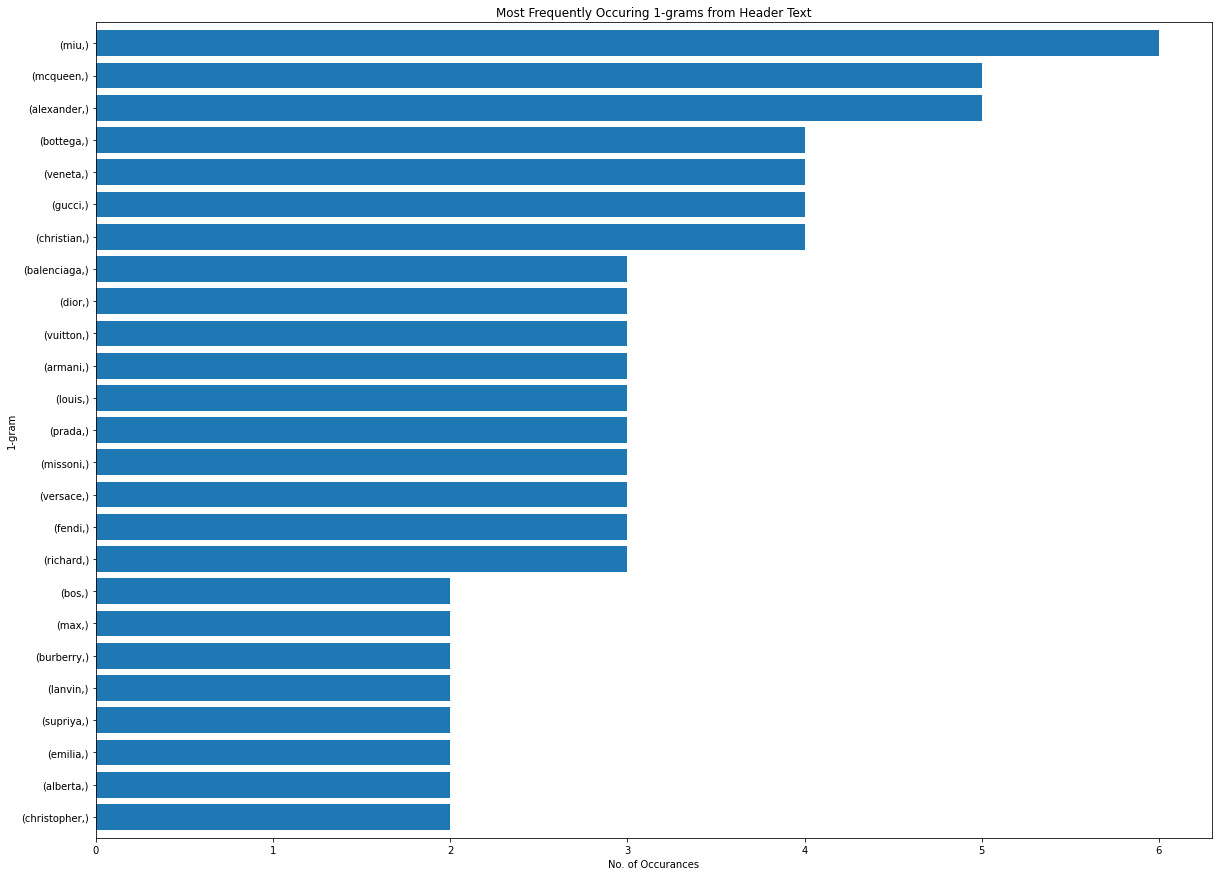

2-grams:
(alexander, mcqueen)    5
(bottega, veneta)       4
(miu, miu)              3
(louis, vuitton)        3
(christian, dior)       3
(lorenzo, serafini)     2
(emilia, wickstead)     2
(philosophy, di)        2
(dolce, gabbana)        2
(di, lorenzo)           2
(molly, goddard)        2
(carolina, herrera)     2
(giorgio, armani)       2
(alberta, ferretti)     2
(tom, ford)             2
(supriya, lele)         2
(richard, quinn)        2
(rejina, pyo)           2
(max, mara)             2
(pyo, valentino)        1
(rogers, coperni)       1
(tinker, tailor)        1
(christopher, john)     1
(collection, shang)     1
(wale, bonner)          1
dtype: int64


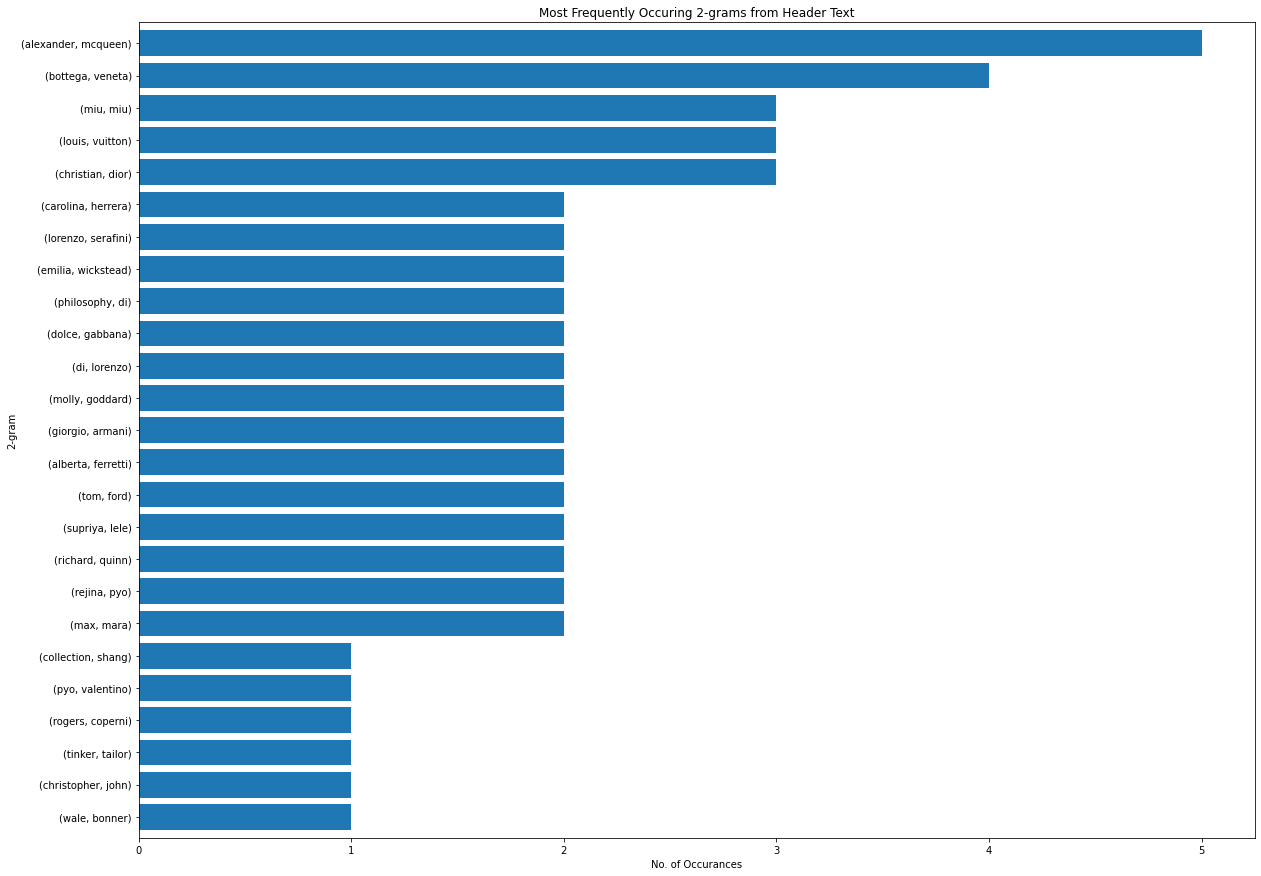

3-grams:
(philosophy, di, lorenzo)     2
(di, lorenzo, serafini)       2
(balmain, loewe, bottega)     1
(vivienne, westwood, no21)    1
(tinker, tailor, givenchy)    1
(louis, vuitton, preen)       1
(pyo, valentino, versace)     1
(tory, burch, paul)           1
(bonner, jil, sander)         1
(fendi, chanel, marque)       1
dtype: int64


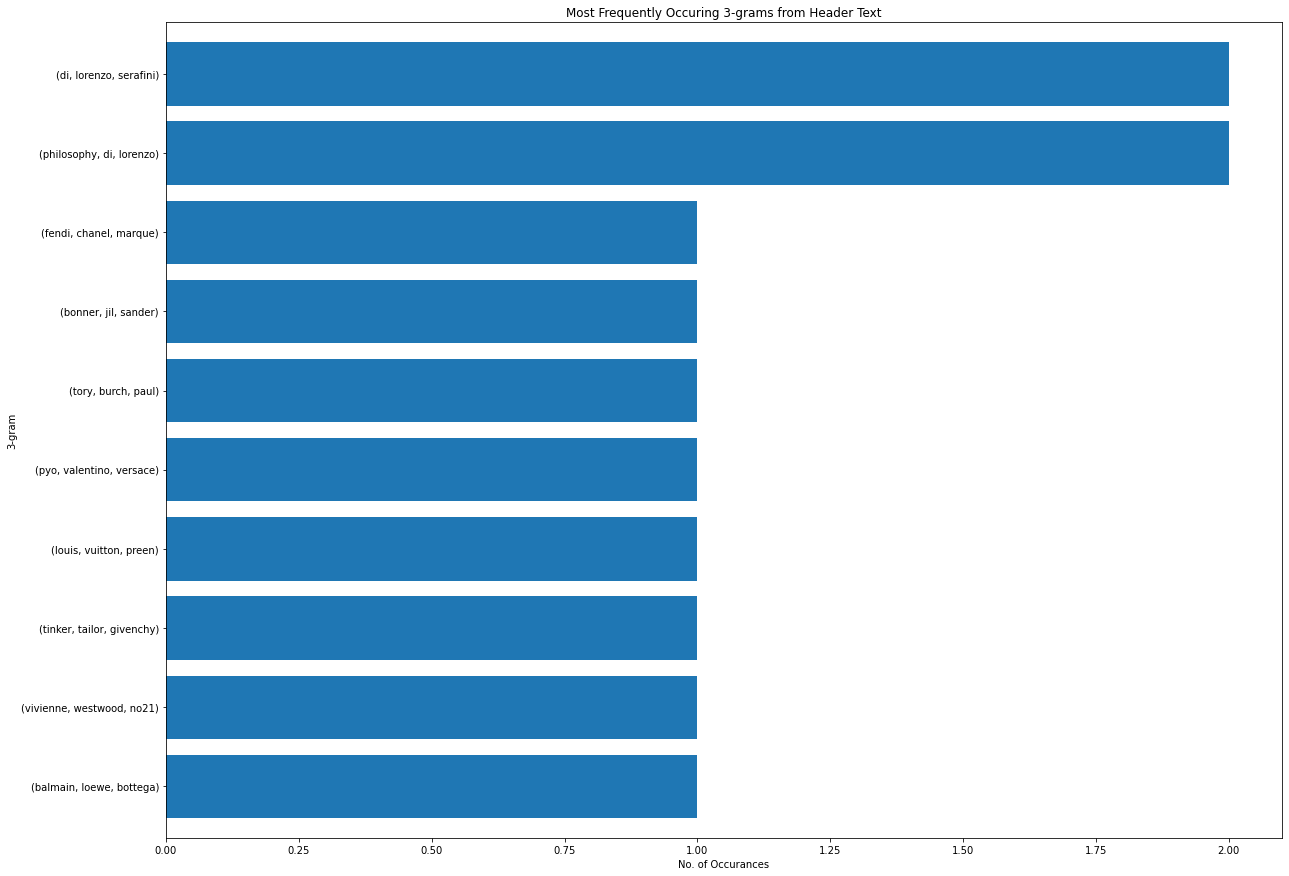

In [9]:
# ngrams based on header text
words = extract_words_from_text(text=" ".join(header_text))
find_ngrams(words=words, source="Header Text")

### Span Text

1-grams:
(miu,)           6
(mcqueen,)       5
(alexander,)     5
(christian,)     4
(veneta,)        4
(fashion,)       4
(bottega,)       4
(gucci,)         4
(dior,)          3
(balenciaga,)    3
(versace,)       3
(vuitton,)       3
(richard,)       3
(missoni,)       3
(fendi,)         3
(armani,)        3
(prada,)         3
(louis,)         3
(emilia,)        2
(di,)            2
(giorgio,)       2
(hermes,)        2
(menu,)          2
(blumarine,)     2
(supriya,)       2
dtype: int64


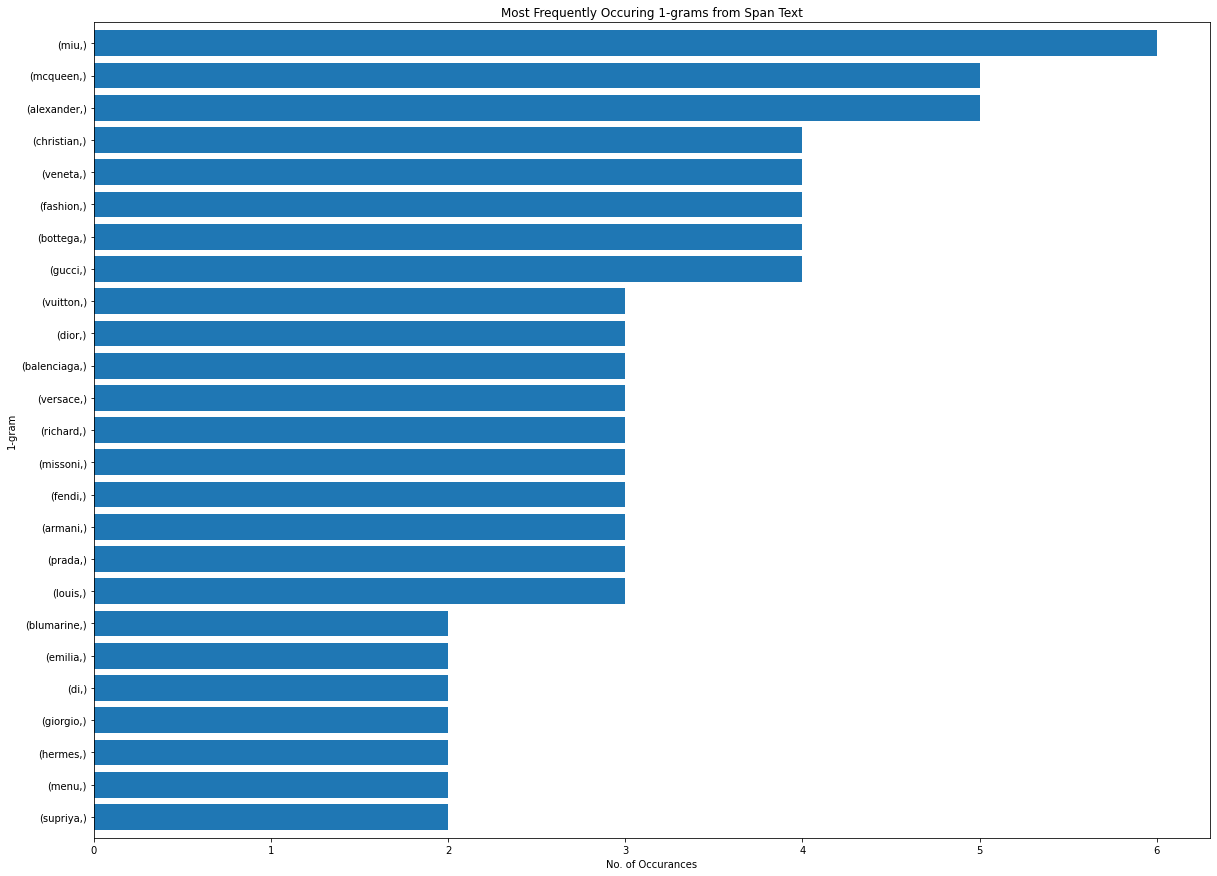

2-grams:
(alexander, mcqueen)       5
(bottega, veneta)          4
(louis, vuitton)           3
(christian, dior)          3
(miu, miu)                 3
(ellie, pithers)           2
(supriya, lele)            2
(max, mara)                2
(giorgio, armani)          2
(alberta, ferretti)        2
(richard, quinn)           2
(tom, ford)                2
(di, lorenzo)              2
(lorenzo, serafini)        2
(rejina, pyo)              2
(philosophy, di)           2
(dolce, gabbana)           2
(emilia, wickstead)        2
(carolina, herrera)        2
(britain, largechevron)    2
(fashion, trend)           2
(molly, goddard)           2
(alice, cary)              2
(navigation, menu)         2
(menu, fashion)            2
dtype: int64


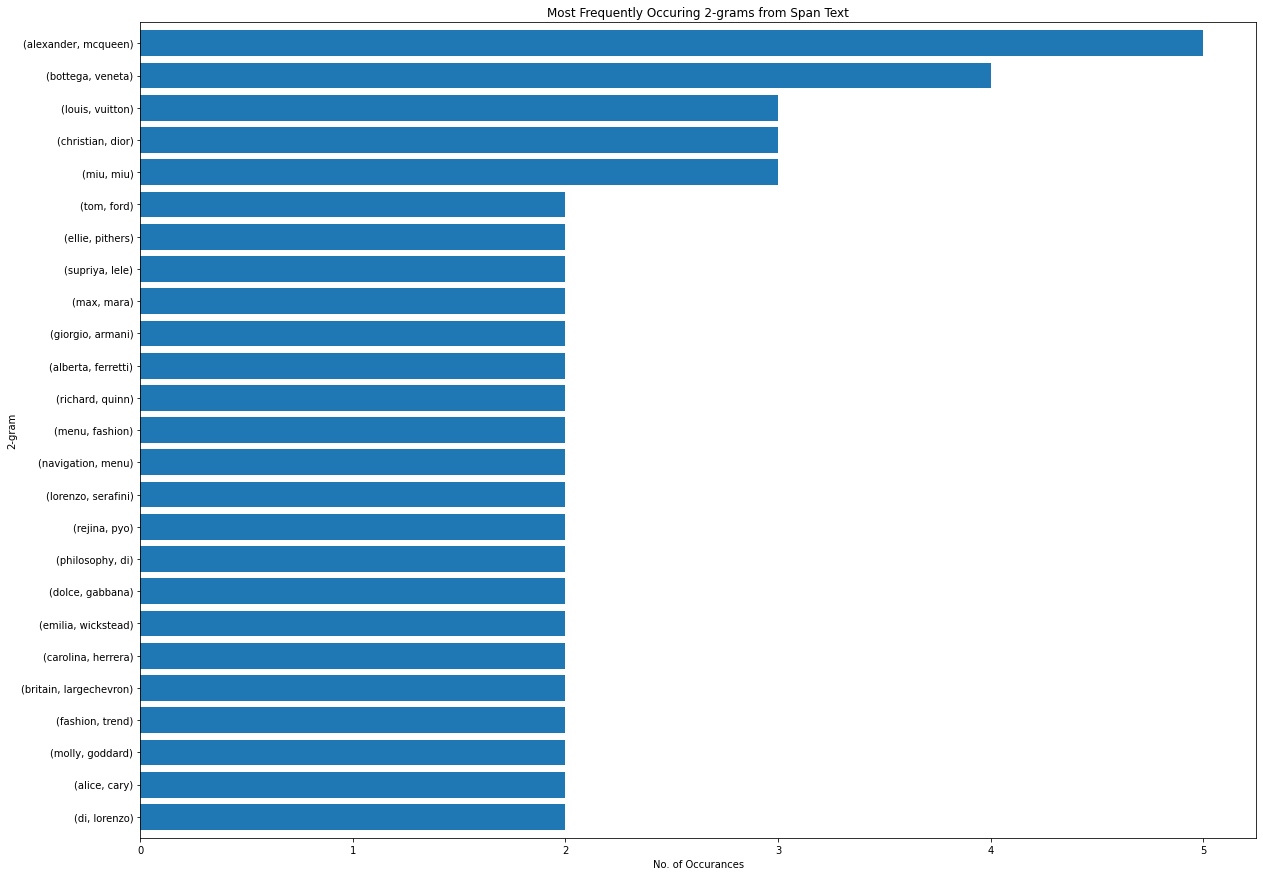

3-grams:
(di, lorenzo, serafini)         2
(navigation, menu, fashion)     2
(philosophy, di, lorenzo)       2
(jw, anderson, 81183)           1
(ferretti, 12183, christian)    1
(blumarine, 30183, diesel)      1
(147183, junya, watanabe)       1
(109183, max, mara)             1
(tailor, 170183, givenchy)      1
(richard, quinn, 51183)         1
dtype: int64


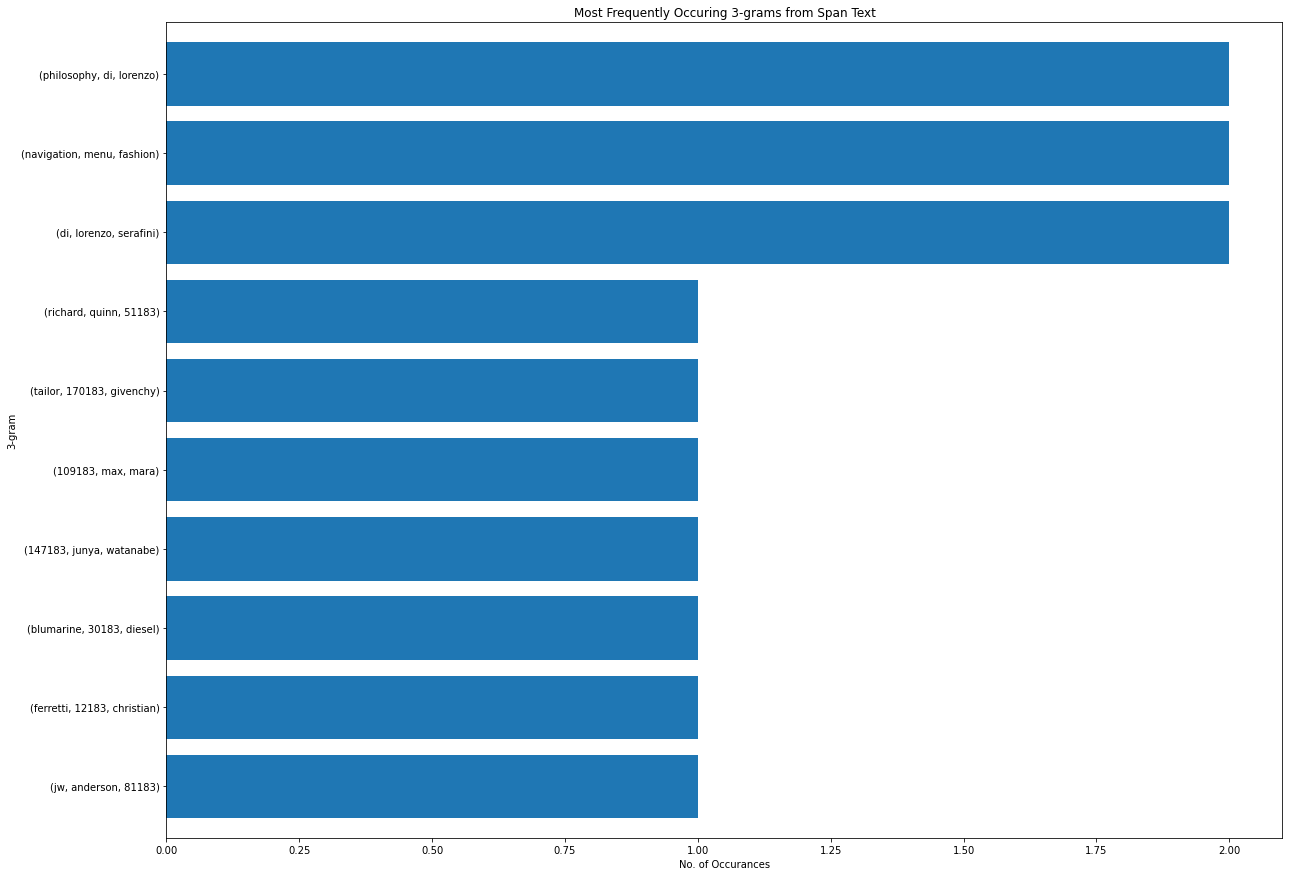

In [10]:
# ngrams based on span text
words = extract_words_from_text(text=" ".join(span_text))
find_ngrams(words=words, source="Span Text")